In [1]:
import csv

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import FormatStrFormatter

In [4]:
with open('performance.csv', 'r') as file:
    reader=csv.DictReader(file)
    inputs = []
    for line in reader:
        inputs.append(line)


In [5]:
inputs[0].keys()

dict_keys(['Number of nodes', 'Delay Threshold', 'MaxSize', 'WorstTimeElapsed', 'MediumTimeElapsed', 'Mediana'])

In [6]:
numberOfNodes = [int(x["Number of nodes"]) for x in inputs if x["Delay Threshold"]=='0.1' if x["MaxSize"]=='10']

In [7]:
numberOfNodes

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

In [8]:
delays = [float(x["Delay Threshold"])  for x in inputs if x["Number of nodes"]=='10' if x["MaxSize"]=='10']

In [9]:
delays

[0.1, 0.3, 0.5, 0.7]

In [10]:
maxSize =  [int(x["MaxSize"]) for x in inputs if x["Delay Threshold"]=='0.1' if x["Number of nodes"]=='10']

In [11]:
maxSize

[10, 25, 50]

# Time in function of number of nodes

In [12]:
timeDelay01=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0.001 for x in inputs if x["Delay Threshold"]=='0.1' if x["MaxSize"]=='25']

In [13]:
timeDelay03=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0.001 for x in inputs if x["Delay Threshold"]=='0.3' if x["MaxSize"]=='25']

In [14]:
timeDelay05=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0.001 for x in inputs if x["Delay Threshold"]=='0.5' if x["MaxSize"]=='25']

In [15]:
timeDelay07=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0.001 for x in inputs if x["Delay Threshold"]=='0.7' if x["MaxSize"]=='25']

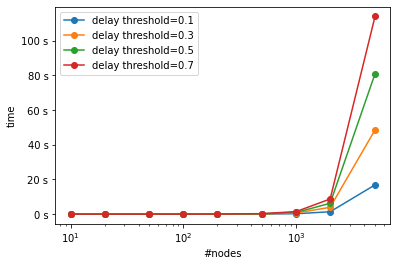

In [16]:
plt.plot(numberOfNodes, timeDelay01, 'o-', label='delay threshold=0.1')
plt.plot(numberOfNodes, timeDelay03, 'o-', label='delay threshold=0.3')
plt.plot(numberOfNodes, timeDelay05, 'o-', label='delay threshold=0.5')
plt.plot(numberOfNodes, timeDelay07, 'o-', label='delay threshold=0.7')
plt.legend()
#plt.title("Time in function of nodes")
plt.xlabel("#nodes")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d s'))
plt.xscale('log')
plt.savefig("node.png")

# Time in function of delay Threshold

In [17]:
timeNodes1000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='1000' if x["MaxSize"]=='25']

timeNodes1000=[x/max(timeNodes1000) for x in timeNodes1000]

In [18]:
timeNodes1000

[0.15493910690121787, 0.45940460081190804, 0.6650879566982408, 1.0]

In [19]:
timeNodes2000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='2000' if x["MaxSize"]=='25']
timeNodes2000=[x/max(timeNodes2000) for x in timeNodes2000]

In [20]:
timeNodes2000

[0.1560886032365431, 0.44955813152760243, 0.7157121542522668, 1.0]

In [21]:
timeNodes5000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='5000' if x["MaxSize"]=='25']
timeNodes5000=[x/max(timeNodes5000) for x in timeNodes5000]

In [22]:
timeNodes5000

[0.14792405774702305, 0.42619164705469104, 0.7102111068179423, 1.0]

Text(0, 0.5, 'time')

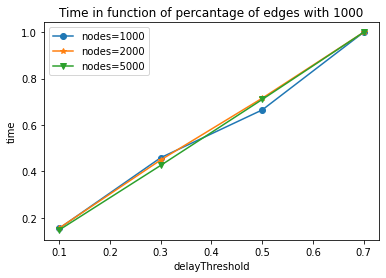

In [23]:
plt.plot(delays, timeNodes1000, 'o-', label='nodes=1000')
plt.plot(delays, timeNodes2000, '*-', label='nodes=2000')
plt.plot(delays, timeNodes5000, 'v-',label='nodes=5000')
plt.legend()
plt.title("Time in function of percantage of edges with 1000")
plt.xlabel("delayThreshold")
plt.ylabel("time")

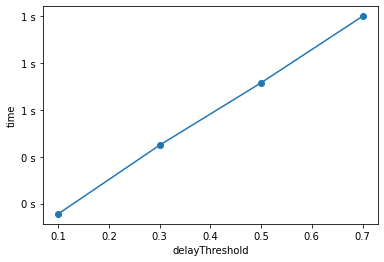

In [24]:
plt.plot(delays, timeNodes2000, 'o-')
#plt.legend()
#plt.title("Performance vs percentage of edges with 2000")
plt.xlabel("delayThreshold")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f s'))

In [25]:
timeNodes5000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='5000' if x["MaxSize"]=='25']

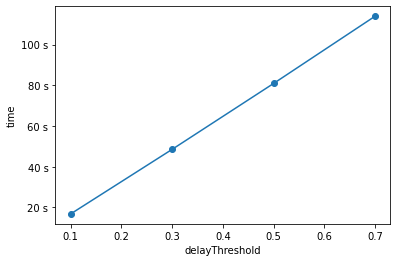

In [26]:
plt.plot(delays, timeNodes5000, 'o-')
#plt.legend()
#plt.title("Performance vs percentage of edges")
plt.xlabel("delayThreshold")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.f s'))

# Performance wrt community size

In [27]:
numberOfNodes

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

In [28]:
newNodes = [x for x in numberOfNodes if x >=50 and x <=5000]

In [29]:
newNodes

[50, 100, 200, 500, 1000, 2000, 5000]

In [30]:
performance=[]
for n in newNodes:
    times = [float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]==str(n) if x["Delay Threshold"]=='0.5']
    performance.append(times)
    if(n ==20):
        print(times)

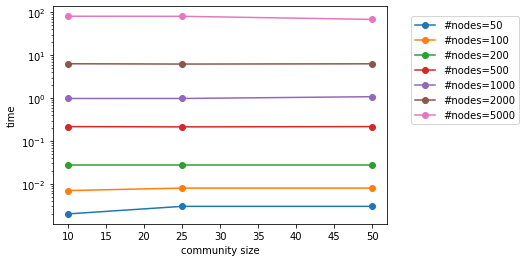

In [34]:
for p in performance:
    plt.plot(maxSize, p, 'o-', label="#nodes="+str(newNodes[performance.index(p)]))
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=1)
    #plt.title("RR with different community sizes")
    plt.xlabel("community size")
    plt.ylabel("time")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f s'))
    plt.yscale('log')
    plt.savefig("communitySizeaaaaa.png")